CSV file import to SQL

In [3]:
import pandas as pd
from sqlalchemy import create_engine

# MySQL connection details
username = "root"
password = "Viswa%4007"      # if your password has @ use %40
host = "127.0.0.1"
port = 3306
database = ("macro_and_finance_stability")

# Create database connection
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

# Read CSV file
df = pd.read_csv("D:/macro ad financial stability/mfs.csv")

# Import data into MySQL
df.to_sql("economics", con=engine, if_exists="replace", index=False)

print("✅ CSV data imported successfully into MySQL!")

✅ CSV data imported successfully into MySQL!


Analysis of the data

Load data

In [2]:
%pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [15]:
fin = pd.read_csv("D:/macro ad financial stability/mfs.csv")

1.Explore data

In [5]:
fin.head()

,country_name,country_code,region,income_group,year,cpi,int_rate,gdp_ growth_rate,gdp,exchange_rate,unemployment_rate
0,Aruba,ABW,Latin America & Caribbean,High income,2000,0.0,10.917450,7.622921,2.735727e+09,1.790000,0.000000
1,Africa Eastern and Southern,AFE,Combined,Not classified,2000,0.0,0.000000,3.212167,4.861410e+11,0.000000,7.788317
2,Afghanistan,AFG,Middle East & North Africa,Low income,2000,0.0,0.000000,0.000000,6.206548e+09,47.357575,7.935000
3,Africa Western and Central,AFW,Combined,Not classified,2000,0.0,0.000000,3.842479,3.256617e+11,0.000000,4.551119
4,Angola,AGO,Sub-Saharan Africa,Lower middle income,2000,0.0,-60.781327,3.054624,3.130450e+10,10.040544,16.682000


In [6]:
fin.tail()

,country_name,country_code,region,income_group,year,cpi,int_rate,gdp_ growth_rate,gdp,exchange_rate,unemployment_rate
6620,Kosovo,XKX,Europe & Central Asia,Upper middle income,2024,1.619450,0.000000,4.412738,8.965121e+09,0.924367,0.000
6621,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2024,0.000000,0.000000,0.000000,0.000000e+00,0.000000,17.086
6622,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2024,4.361152,7.493696,0.579854,3.654148e+11,18.328658,33.168
6623,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2024,14.985626,0.000000,4.043148,2.869582e+10,26.166419,5.961
6624,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2024,0.000000,0.000000,2.029484,2.363417e+10,3266.331913,8.554


In [37]:
fin.rename(columns={'gdp_ growth_rate': 'gdp_growth_rate'}, inplace=True)


In [38]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6625 entries, 2 to 6624
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country_name       6625 non-null   object 
 1   country_code       6625 non-null   object 
 2   region             6625 non-null   object 
 3   income_group       6625 non-null   object 
 4   year               6625 non-null   int64  
 5   cpi                6625 non-null   float64
 6   int_rate           6625 non-null   float64
 7   gdp_growth_rate    6625 non-null   float64
 8   gdp                6625 non-null   float64
 9   exchange_rate      6625 non-null   float64
 10  unemployment_rate  6625 non-null   float64
 11  gdp_formatted      6625 non-null   object 
 12  yoy_gdp            6101 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 724.6+ KB


In [39]:
g=fin['gdp_growth_rate']
print(g)

2        0.000000
267     -9.431974
532     28.600001
797      8.832278
1062     1.414118
          ...    
5564    -7.816933
5829     8.468039
6094     6.139176
6359     5.336770
6624     2.029484
Name: gdp_growth_rate, Length: 6625, dtype: float64


In [8]:
fin.describe()

,year,cpi,int_rate,gdp_ growth_rate,gdp,exchange_rate,unemployment_rate
count,6625.000000,6625.000000,6625.000000,6625.000000,6.625000e+03,6.625000e+03,6625.000000
mean,2012.000000,4.117911,2.676080,3.312502,2.153065e+12,1.015276e+06,6.839945
std,7.211647,13.750352,7.460380,5.449217,7.759033e+12,8.259876e+07,5.708772
min,2000.000000,-16.859691,-81.132114,-54.336106,0.000000e+00,0.000000e+00,0.000000
25%,2006.000000,0.000000,0.000000,1.117540,5.671297e+09,6.471793e-01,3.181086
50%,2012.000000,2.008489,0.000000,3.465681,3.958475e+10,2.666620e+00,5.621000
75%,2018.000000,4.671452,4.718425,5.668847,4.327911e+11,5.175622e+01,9.068634
max,2024.000000,557.201817,93.915078,91.137039,9.669813e+13,6.723052e+09,37.320000


In [9]:
fin.isnull().sum()

country_name         0
country_code         0
region               0
income_group         0
year                 0
cpi                  0
int_rate             0
gdp_ growth_rate     0
gdp                  0
exchange_rate        0
unemployment_rate    0
dtype: int64

In [12]:
print(fin['region'].unique())
print(fin['income_group'].unique())

['Latin America & Caribbean' 'Combined' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Europe & Central Asia' 'East Asia & Pacific'
 'South Asia' 'North America']
['High income' 'Not classified' 'Low income' 'Lower middle income'
 'Upper middle income']


2.convert GDP to International number system

In [16]:
def format_gdp(value):
    if value >= 1e12:
        return str(round(value/1e12, 2)) + " T"
    elif value >= 1e9:
        return str(round(value/1e9, 2)) + " B"
    elif value >= 1e6:
        return str(round(value/1e6, 2)) + " M"
    else:
        return str(value)

fin['gdp_formatted'] = fin['gdp'].apply(format_gdp)
fin[['country_name', 'gdp', 'gdp_formatted']].head()


,country_name,gdp,gdp_formatted
0,Aruba,2.735727e+09,2.74 B
1,Africa Eastern and Southern,4.861410e+11,486.14 B
2,Afghanistan,6.206548e+09,6.21 B
3,Africa Western and Central,3.256617e+11,325.66 B
4,Angola,3.130450e+10,31.3 B


3.Descriptive statistics by region 

In [22]:
region_stats = fin.groupby('region')[['gdp','cpi','unemployment_rate']].mean()
region_stats['gdp_formatted'] = region_stats['gdp'].apply(format_gdp)  #  add formatted GDP column
region_stats = region_stats[['gdp_formatted', 'cpi', 'unemployment_rate']]  # select only required column
print(region_stats)


                           gdp_formatted       cpi  unemployment_rate
region                                                               
Combined                         10.44 T  3.159422           6.578288
East Asia & Pacific             518.79 B  2.038404           3.468563
Europe & Central Asia           343.06 B  3.486237           7.630113
Latin America & Caribbean       111.08 B  4.355602           6.139262
Middle East & North Africa      138.84 B  4.742352           9.899983
North America                     6.35 T  1.601945           4.222707
South Asia                      356.43 B  4.362489           6.260580
Sub-Saharan Africa               30.04 B  7.062108           8.128414


4.Top 10 countries with highest GDP per year

In [28]:
top10_gdp = fin.sort_values(['year','gdp'], ascending=False).groupby('year').head(10)
top10_gdp['gdp_formatted'] = top10_gdp['gdp'].apply(format_gdp)  #  add formatted GDP column
top10_gdp[['year','country_name','gdp_formatted']]  # select only required column



,year,country_name,gdp_formatted
6618,2024,World,96.7 T
6455,2024,High income,59.15 T
6540,2024,OECD members,56.41 T
6557,2024,Post-demographic dividend,52.48 T
6463,2024,IDA & IBRD total,40.67 T
...,...,...,...
169,2000,North America,14.89 T
250,2000,United States,13.72 T
103,2000,IDA & IBRD total,11.99 T
73,2000,European Union,11.32 T


5. Year on year GDP growth

In [31]:
fin = fin.sort_values(['country_name', 'year'])
fin['yoy_gdp'] = fin.groupby('country_name')['gdp'].pct_change()

fin[['country_name','year','gdp','yoy_gdp']].head()


,country_name,year,gdp,yoy_gdp
2,Afghanistan,2000,6.206548e+09,NaN
267,Afghanistan,2001,5.621148e+09,-0.094320
532,Afghanistan,2002,7.228796e+09,0.286000
797,Afghanistan,2003,7.867263e+09,0.088323
1062,Afghanistan,2004,7.978516e+09,0.014141


top countries

In [32]:
fin.groupby('country_name')['yoy_gdp'].mean().sort_values(ascending=False).head(10)


country_name
Djibouti                    inf
South Sudan                 inf
Cayman Islands              inf
Channel Islands             inf
Northern Mariana Islands    inf
Liechtenstein               inf
Virgin Islands (U.S.)       inf
New Caledonia               inf
Kosovo                      inf
Guam                        inf
Name: yoy_gdp, dtype: float64

6.Detect recession Years

In [40]:
fin['recession_flag'] = fin['gdp_growth_rate'].apply(lambda x: 1 if x < 0 else 0)

recession_count = fin.groupby('country_name')['recession_flag'].sum()
recession_count.head(10)


country_name
Afghanistan                     4
Africa Eastern and Southern     1
Africa Western and Central      1
Albania                         1
Algeria                         1
American Samoa                 10
Andorra                         7
Angola                          5
Antigua and Barbuda             7
Arab World                      1
Name: recession_flag, dtype: int64

7.correlation 

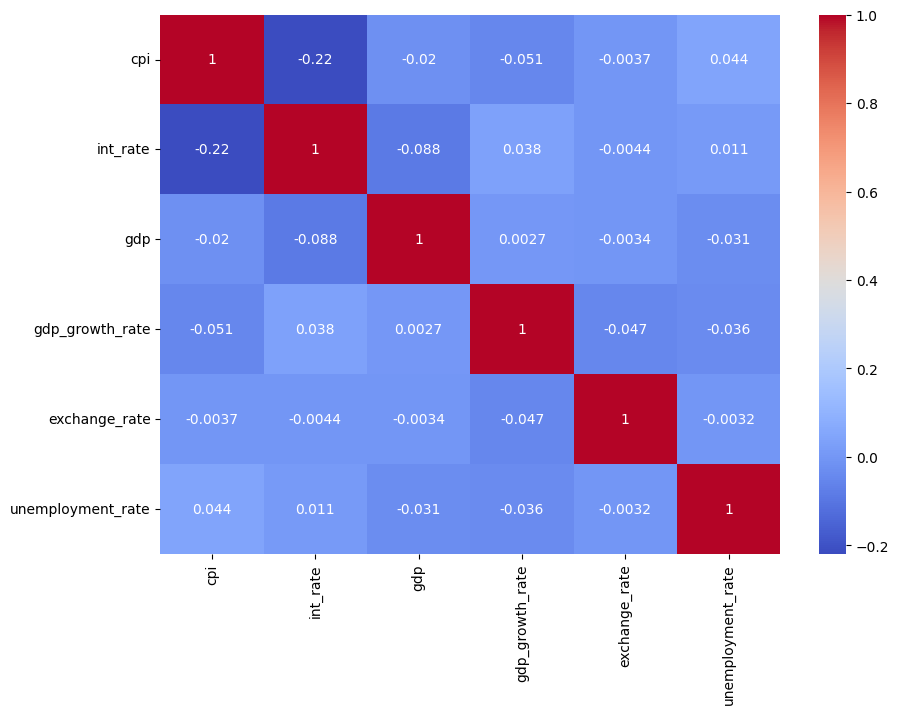

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['cpi', 'int_rate', 'gdp', 'gdp_growth_rate', 'exchange_rate', 'unemployment_rate']
corr = fin[numeric_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


8.GDP trend line for selected countries

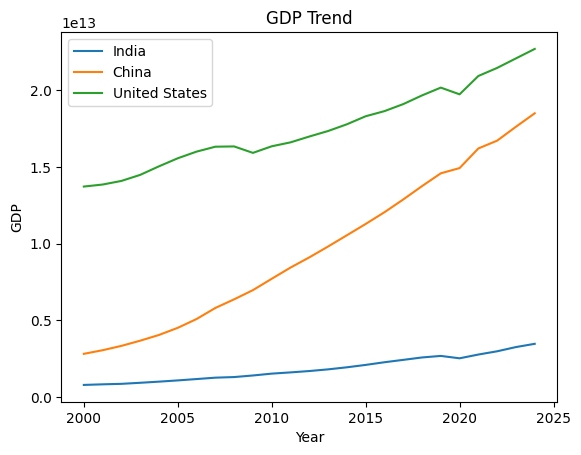

In [42]:
countries = ["India", "China", "United States"]

for c in countries:
    temp = fin[fin['country_name'] == c]
    plt.plot(temp['year'], temp['gdp'], label=c)

plt.legend()
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP Trend")
plt.show()


9. GDP trend by Income group

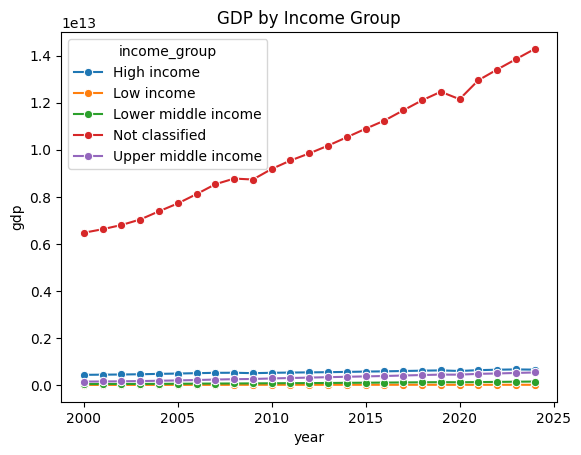

In [43]:
income_trend = fin.groupby(['income_group','year'])['gdp'].mean().reset_index()

sns.lineplot(data=income_trend, x='year', y='gdp', hue='income_group', marker="o")
plt.title("GDP by Income Group")
plt.show()


10. scatter plot: GDP growth rate vs CPI

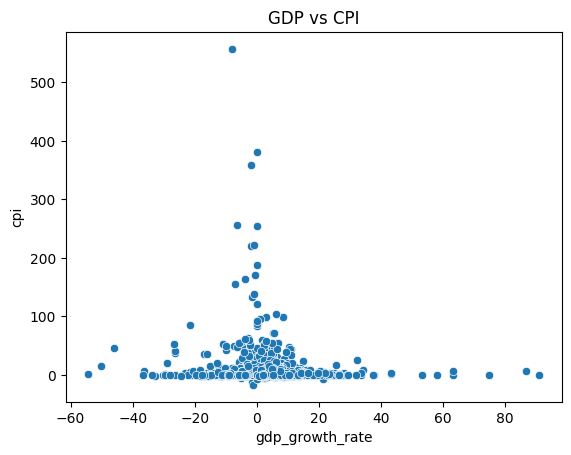

In [46]:
sns.scatterplot(data=fin, x='gdp_growth_rate', y='cpi')
plt.title("GDP vs CPI")
plt.show()


Trend line

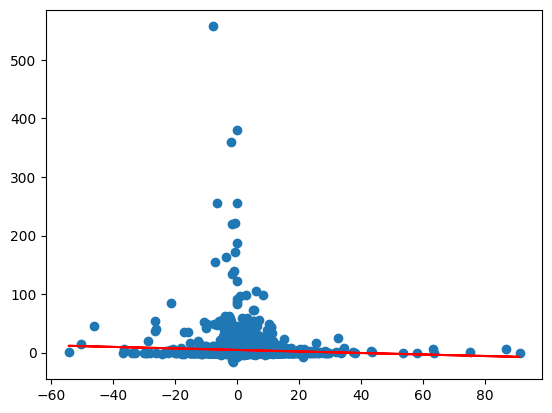

In [47]:
import numpy as np

x = fin['gdp_growth_rate']
y = fin['cpi']
coef = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, coef[0]*x + coef[1], color='red')
plt.show()


11. Most Volatile GDP countries

In [53]:
gdp_volatility = fin.groupby('country_name')['gdp'].std().sort_values(ascending=False)

# Apply formatting
gdp_volatility_formatted = gdp_volatility.apply(format_gdp)

gdp_volatility_formatted.head(10)


country_name
World                        14.69 T
IDA & IBRD total              8.98 T
Low & middle income           8.39 T
IBRD only                     8.38 T
Middle income                 8.33 T
East Asia & Pacific           6.73 T
Upper middle income           6.66 T
Late-demographic dividend     6.49 T
High income                   6.25 T
OECD members                   5.8 T
Name: gdp, dtype: object

12. Multiple Regression

In [54]:
import statsmodels.api as sm

model_fin = fin[['gdp','cpi','int_rate','gdp_growth_rate','unemployment_rate']].dropna()

X = model_fin[['cpi','int_rate','gdp_growth_rate','unemployment_rate']]
y = model_fin['gdp']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     16.99
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           7.21e-14
Time:                        18:20:36   Log-Likelihood:            -2.0600e+05
No. Observations:                6625   AIC:                         4.120e+05
Df Residuals:                    6620   BIC:                         4.120e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.757e+12   1.67e+1

13. Filter Data by income group function

In [57]:
def get_data_by_income(group):
    return fin[fin['income_group'] == group]

get_data_by_income("High income").head()


,country_name,country_code,region,income_group,year,cpi,int_rate,gdp_growth_rate,gdp,exchange_rate,unemployment_rate,gdp_formatted,yoy_gdp,recession_flag
11,American Samoa,ASM,East Asia & Pacific,High income,2000,0.0,0.0,0.000000,0.000000e+00,1.0,0.0,0.0,NaN,0
276,American Samoa,ASM,East Asia & Pacific,High income,2001,0.0,0.0,0.000000,0.000000e+00,1.0,0.0,0.0,NaN,0
541,American Samoa,ASM,East Asia & Pacific,High income,2002,0.0,0.0,0.000000,7.449237e+08,1.0,0.0,744.92 M,inf,0
806,American Samoa,ASM,East Asia & Pacific,High income,2003,0.0,0.0,0.965517,7.521160e+08,1.0,0.0,752.12 M,0.009655,0
1071,American Samoa,ASM,East Asia & Pacific,High income,2004,0.0,0.0,0.409836,7.551985e+08,1.0,0.0,755.2 M,0.004098,0


14. GDP growth rate per region

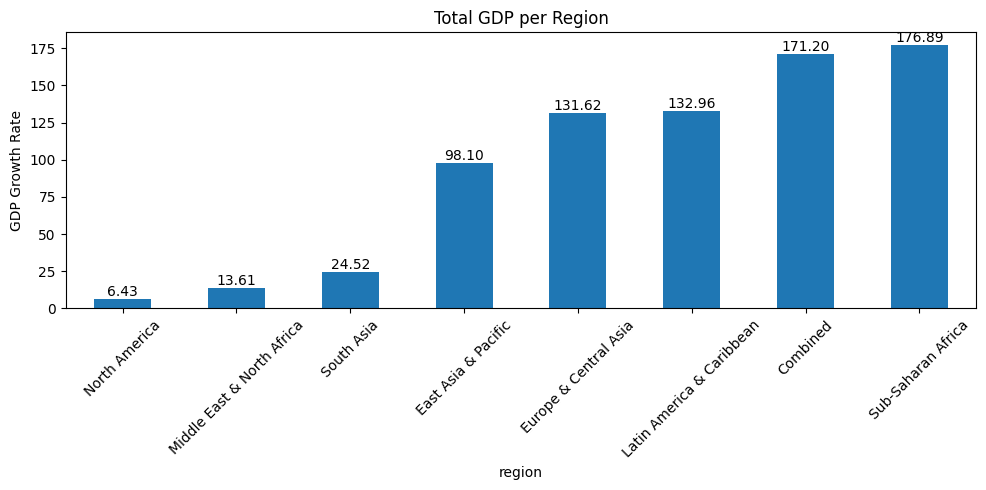

In [62]:
import matplotlib.pyplot as plt

latest_year = fin['year'].max()

region_gdp = (
    fin[fin['year'] == latest_year]
    .groupby('region')['gdp_growth_rate']
    .sum()
    .sort_values()
)

plt.figure(figsize=(10,5))
bars = region_gdp.plot(kind='bar')

plt.title("Total GDP per Region")
plt.ylabel("GDP Growth Rate")
plt.xticks(rotation=45)

# 👉 Add data labels
for bar in bars.patches:
    value = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        value,
        f"{value:.2f}",   # format to 2 decimals
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


15.GDP forecasting using Arima

In [60]:
from statsmodels.tsa.arima.model import ARIMA

country = "India"
temp = fin[fin['country_name'] == country].set_index('year')

model = ARIMA(temp['gdp'], order=(2,1,2))
result = model.fit()

forecast = result.forecast(steps=5)

# Format forecasted GDP values
forecast_formatted = forecast.apply(format_gdp)

print("Next 5-year GDP forecast (formatted):")
print(forecast_formatted)


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\sit

Next 5-year GDP forecast (formatted):
25    3.59 T
26     3.7 T
27    3.81 T
28    3.92 T
29    4.03 T
Name: predicted_mean, dtype: object


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
